# Persistency of Drug Prediction

Classification model to predict the persistency of drug as per the physician prescription

In [1]:
# The relevant libraries

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
# import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
# import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
# Convert the xlsx file to csv

# Read and store content of the excel file 
read_file = pd.read_excel ("Healthcare_dataset.xlsx", 'Dataset')
  
# Write the dataframe object into csv file
read_file.to_csv ("Healthcare_dataset.csv", 
                  index = None,
                  header=True)

In [3]:
# Read the csv dataset
data = pd.read_csv('Healthcare_dataset.csv')

# Drop the ID variable
data = data.drop(["Ptid"], axis=1)

data.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,1


# Data Cleaning

In [4]:
# Total number of missing values
data.isnull().sum().sum()

0

In [5]:
# Dimension of the dataset
data.shape

(3424, 68)

In [6]:
# Standardize column names

columns = list(data.columns)

for item in columns:
    special_characters = "!@#$%^&*()-+?=,<>/"
    
    for character in special_characters:
        if character in item:
            print(f"Feature: {item}, is not well formatted")

Feature: Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx, is not well formatted


In [7]:
# Remove the "," from this feature name

data["Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx"] = data["Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx"]
data = data.drop(["Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx"], axis=1)
data.shape

(3424, 68)

In [8]:
# Numeric Columns
numeric_col = list(data._get_numeric_data().columns)
numeric_col

['Dexa_Freq_During_Rx', 'Count_Of_Risks']

### Remove Outliers

In [9]:
data['Dexa_Freq_During_Rx'].value_counts()

0      2488
5       114
6       107
7        93
8        71
4        68
10       55
12       52
3        46
14       38
9        32
11       30
1        24
2        24
13       19
20       15
16       14
18       14
22       13
26       10
24       10
15        9
30        7
17        7
28        7
21        7
36        5
19        3
42        3
32        3
34        3
52        2
48        2
58        2
25        2
39        2
88        2
54        1
146       1
50        1
35        1
44        1
108       1
72        1
40        1
68        1
45        1
38        1
69        1
118       1
66        1
110       1
33        1
23        1
27        1
81        1
37        1
29        1
Name: Dexa_Freq_During_Rx, dtype: int64

<AxesSubplot:xlabel='Dexa_Freq_During_Rx', ylabel='Density'>

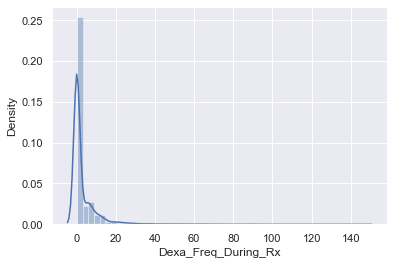

In [10]:
# Spot Outliers for Dexa_Freq_During_Rx
sns.distplot(data['Dexa_Freq_During_Rx'])

In [11]:
# To remove the 99th percentile
q = data['Dexa_Freq_During_Rx'].quantile(0.99)
data_1 = data[data['Dexa_Freq_During_Rx']<q]
data_1.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3389.000000,3389.000000
mean,2.440248,1.240484
std,5.183446,1.095904
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,34.000000,7.000000


In [12]:
data_1['Dexa_Freq_During_Rx'].value_counts()

0     2488
5      114
6      107
7       93
8       71
4       68
10      55
12      52
3       46
14      38
9       32
11      30
1       24
2       24
13      19
20      15
16      14
18      14
22      13
26      10
24      10
15       9
30       7
28       7
17       7
21       7
19       3
34       3
32       3
25       2
27       1
23       1
33       1
29       1
Name: Dexa_Freq_During_Rx, dtype: int64

<AxesSubplot:xlabel='Dexa_Freq_During_Rx', ylabel='Density'>

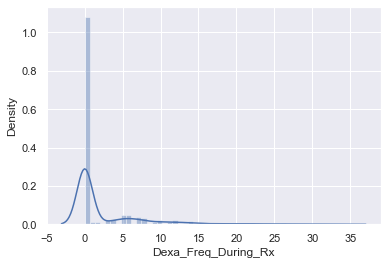

In [13]:
sns.distplot(data_1['Dexa_Freq_During_Rx'])

In [14]:
data_1['Count_Of_Risks'].value_counts()

1    1228
0     960
2     773
3     315
4      90
5      15
6       6
7       2
Name: Count_Of_Risks, dtype: int64

<AxesSubplot:xlabel='Count_Of_Risks', ylabel='Density'>

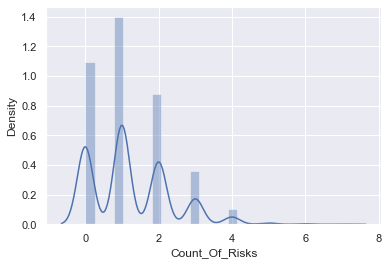

In [15]:
# Spot Outliers for Count_Of_Risks
sns.distplot(data_1['Count_Of_Risks'])

In [16]:
# To remove the 99th percentile
q = data_1['Count_Of_Risks'].quantile(0.99)
data_2 = data_1[data_1['Count_Of_Risks']<q]
data_2.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3276.000000,3276.000000
mean,2.434066,1.135226
std,5.215384,0.946362
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,2.000000,2.000000
max,34.000000,3.000000


In [17]:
data_2['Count_Of_Risks'].value_counts()

1    1228
0     960
2     773
3     315
Name: Count_Of_Risks, dtype: int64

<AxesSubplot:xlabel='Count_Of_Risks', ylabel='Density'>

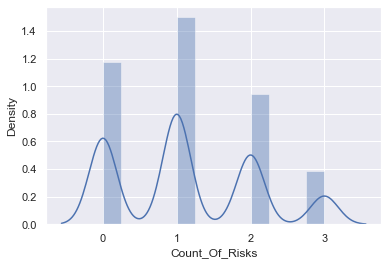

In [18]:
sns.distplot(data_2['Count_Of_Risks'])

In [19]:
# Data without outliers
data = data_2

In [20]:
# Data containing only categorical variables
categoric_data = data.drop(numeric_col, axis=1)

In [21]:
# Categorical Columns
cat_columns = list(categoric_data.columns)

In [22]:
# Inspect the unique values of the categorical variables

for item in cat_columns:
    print(f"{item}: {categoric_data[item].unique()}")
    print("")

Persistency_Flag: ['Persistent' 'Non-Persistent']

Gender: ['Male' 'Female']

Race: ['Caucasian' 'Asian' 'Other/Unknown' 'African American']

Ethnicity: ['Not Hispanic' 'Hispanic' 'Unknown']

Region: ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']

Age_Bucket: ['>75' '55-65' '65-75' '<55']

Ntm_Speciality: ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'PEDIATRICS' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT SURGERY' 'PLASTIC SURGERY' 'CLINICAL NURSE SPECIALIST'
 'OTOLARYNGOLOGY' 'HOSPITAL MEDICINE' 'ORTHOPEDICS' 'NEPHROLOGY'
 'GERIATRIC MEDICINE' 'HOSPICE AND PALLIATIVE MEDICINE'
 'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS &

In [23]:
# The target variable
data["Persistency_Flag"].unique()

array(['Persistent', 'Non-Persistent'], dtype=object)

In [24]:
# Encode the Target variable

# data["Persistency_Flag"] = data["Persistency_Flag"].map({"Non-Persistent":0, "Persistent":1})

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data["Persistency_Flag"] = lb_make.fit_transform(data["Persistency_Flag"])

# data["Persistency_Flag"].head()

data["Persistency_Flag"].unique()

<ipython-input-24-f18f0a11ba41>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Persistency_Flag"] = lb_make.fit_transform(data["Persistency_Flag"])


array([1, 0])

Note: 1 = Persistent, 0 = Non-Persistent 

In [25]:
data["Persistency_Flag"].unique()

array([1, 0])

### Balance Dataset

In [26]:
data["Persistency_Flag"].value_counts()

0    2070
1    1206
Name: Persistency_Flag, dtype: int64

Note: The Non-Persistent observations are almost double the Persistent observations.

Next step is to balance the data using either the Random-Undersampling or Random_Oversampling method.

In [27]:
# Undersampling 

# # import library
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
# x_temp, y_temp = rus.fit_resample(data.drop(["Persistency_Flag"], axis=1), data["Persistency_Flag"])


# Oversampling

# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)
x_temp, y_temp = ros.fit_resample(data.drop(["Persistency_Flag"], axis=1), data["Persistency_Flag"])

In [28]:
data = pd.concat([x_temp, y_temp], axis=1)

In [29]:
data["Persistency_Flag"].value_counts()

1    2070
0    2070
Name: Persistency_Flag, dtype: int64

In [30]:
cleaned_data = data

# Select the Features
features = cleaned_data.drop(["Persistency_Flag"], axis=1)

In [31]:
# Convert categorical feature variables
data_with_dummies = pd.get_dummies(features, prefix=None, drop_first = True, prefix_sep='_')

In [32]:
# Remove special characters from the feature names
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# pd.reset_option('all')

data_with_dummies.columns = data_with_dummies.columns.str.replace('[">"]', 'greater_than')
data_with_dummies.columns = data_with_dummies.columns.str.replace('[" "]', '_')
data_with_dummies.columns = data_with_dummies.columns.str.replace('["&"]', 'and')
data_with_dummies.columns = data_with_dummies.columns.str.replace('["/"]', '_or_')
data_with_dummies.columns = data_with_dummies.columns.str.replace('[","]', '_')
data_with_dummies.columns = data_with_dummies.columns.str.replace('["<"]', 'less_than')
data_with_dummies.columns = data_with_dummies.columns.str.replace('["\-"]', '_')
data_with_dummies.columns = data_with_dummies.columns.str.replace('["\."]', '_point_')
# data_with_dummies.columns = data_with_dummies.columns.str.replace('["_"]', '')

### Create Dummy Variables

In [33]:
# For loop to find dummy features that are not well formatted

columns = list(data_with_dummies.columns)
            
for item in columns:
    special_characters = "!@#$%^&*()-+?=,<>/"
    
    for character in special_characters:
        if character in item:
            print(f"Feature: {item}, is not well formatted")

In [34]:
data_with_dummies.columns

Index(['Dexa_Freq_During_Rx', 'Count_Of_Risks', 'Gender_Male', 'Race_Asian',
       'Race_Caucasian', 'Race_Other_or_Unknown', 'Ethnicity_Not_Hispanic',
       'Ethnicity_Unknown', 'Region_Northeast', 'Region_Other_or_Unknown',
       ...
       'Risk_Family_History_Of_Osteoporosis_Y', 'Risk_Low_Calcium_Intake_Y',
       'Risk_Vitamin_D_Insufficiency_Y', 'Risk_Poor_Health_Frailty_Y',
       'Risk_Excessive_Thinness_Y', 'Risk_Hysterectomy_Oophorectomy_Y',
       'Risk_Estrogen_Deficiency_Y', 'Risk_Immobilization_Y',
       'Risk_Recurring_Falls_Y',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx_Y'],
      dtype='object', length=116)

In [35]:
data_with_dummies.head()

,Dexa_Freq_During_Rx,Count_Of_Risks,Gender_Male,Race_Asian,Race_Caucasian,Race_Other_or_Unknown,Ethnicity_Not_Hispanic,Ethnicity_Unknown,Region_Northeast,Region_Other_or_Unknown,...,Risk_Family_History_Of_Osteoporosis_Y,Risk_Low_Calcium_Intake_Y,Risk_Vitamin_D_Insufficiency_Y,Risk_Poor_Health_Frailty_Y,Risk_Excessive_Thinness_Y,Risk_Hysterectomy_Oophorectomy_Y,Risk_Estrogen_Deficiency_Y,Risk_Immobilization_Y,Risk_Recurring_Falls_Y,Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx_Y
0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,2,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Selecting the final Dependent and Independent variables

In [36]:
cleaned_data["Persistency_Flag"].value_counts()

1    2070
0    2070
Name: Persistency_Flag, dtype: int64

In [37]:
y = cleaned_data["Persistency_Flag"]
X = data_with_dummies

In [38]:
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 44)

# Model Selection and Optimization

In [39]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [40]:
# To ignore convergence warning
from sklearn.model_selection import cross_val_score
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

def cal_accuracy(y_test, y_hat):

    print("Confusion Matrix: \n",
        confusion_matrix(y_test, y_hat))

    print ("F1 Score: ",
           f1_score(y_test,y_hat)*100)

    print("Report : \n",
    classification_report(y_test, y_hat))
    

def Model(xtrain, ytrain, xval, yval, name, model):
    model_name = name + "Model"
    
    print("\033[1m" + name + "\033[0m")
    print(f"")
    
    # Train Model
    model.fit(xtrain, ytrain)
    
#     Cross Validation with the training data set
#     print(cross_val_score(model, xval, yval, scoring="f1", cv = 5)*100)
#     mean_score = cross_val_score(model, xval, yval, scoring="f1", cv = 5).mean()
#     print(f"Mean CV F1: {mean_score*100}")
    
    
    y_hat_val = model.predict(xval)
#     y_hat_train = model.predict(xtrain)
#     print(f"Train Accuracy Score: {round(accuracy_score(y_hat_train, ytrain), 2)}")
#     print(f"Test Accuracy Score: {round(accuracy_score(y_hat_test, ytest), 2)}")
    print(f"")
        
    cal_accuracy(yval, y_hat_val)
    
    
Classification_models = {"LogisticRegression":LogisticRegression(solver='lbfgs', verbose=0),
                         "DecisionTreeClassifier":DecisionTreeClassifier(),
                         "XGBClassifier":XGBClassifier(),
                         "BaggingClassifier":BaggingClassifier(),
                         "BernoulliNB":BernoulliNB(),
                         "SGDClassifier":SGDClassifier(),
                         "KNeighborsClassifier":KNeighborsClassifier(),
                         "RandomForestClassifier":RandomForestClassifier(),
                         "AdaBoostClassifier":AdaBoostClassifier(),
                         "Gradient Boosting Classifier":GradientBoostingClassifier(),
                         "LGBM Classifier":LGBMClassifier(),
                        }

for name, model in Classification_models.items():
    Model(X_train, y_train, X_test, y_test, name, model)

LogisticRegression


Confusion Matrix: 
 [[331  79]
 [ 83 335]]
F1 Score:  80.52884615384615
Report : 
               precision    recall  f1-score   support

           0       0.80      0.81      0.80       410
           1       0.81      0.80      0.81       418

    accuracy                           0.80       828
   macro avg       0.80      0.80      0.80       828
weighted avg       0.80      0.80      0.80       828

DecisionTreeClassifier


Confusion Matrix: 
 [[304 106]
 [ 49 369]]
F1 Score:  82.6427771556551
Report : 
               precision    recall  f1-score   support

           0       0.86      0.74      0.80       410
           1       0.78      0.88      0.83       418

    accuracy                           0.81       828
   macro avg       0.82      0.81      0.81       828
weighted avg       0.82      0.81      0.81       828

XGBClassifier


Confusion Matrix: 
 [[337  73]
 [ 51 367]]
F1 Score:  85.54778554778555
Report : 
               precision    recall  f

Note: The RandomForest Classifier Model performed well on the dataset.

## Hyperparameter Tuning

## Grid Search - RandomForest

In [41]:
# sklearn.metrics.get_scorer_names()

In [42]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'n_estimators': [90,100,115,130], # learning rate
    'criterion': ["gini", "entropy"], # number of epochs
    'max_depth': range(2, 20, 1), # loss function
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features': ['sqrt', 'log2']
}

# Create a based model
clf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = clf, scoring="f1", param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

bestModel = rf_random.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [43]:
y_hat_test = bestModel.predict(X_test)
cal_accuracy(y_test, y_hat_test)

Confusion Matrix: 
 [[350  60]
 [ 65 353]]
F1 Score:  84.95788206979543
Report : 
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       410
           1       0.85      0.84      0.85       418

    accuracy                           0.85       828
   macro avg       0.85      0.85      0.85       828
weighted avg       0.85      0.85      0.85       828

